In [54]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.sparse import csr_matrix
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
from fuzzywuzzy import process, fuzz
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pandas as pd
import gradio as gr
from langdetect import detect, LangDetectException

In [56]:
tracks_data = pd.read_csv('tracks.csv')
filtered_data = tracks_data[(tracks_data['popularity'] > 40) & (tracks_data['instrumentalness'] <= 0.85)]

In [57]:
import pandas as pd
import ast

# Function to process each entry in the 'artists' column
def process_artists(entry):
    try:
        # Attempt to interpret the entry as a list
        entry_list = ast.literal_eval(entry)
        # If successful and it's a list, join the elements with commas
        if isinstance(entry_list, list):
            return ', '.join(entry_list)
    except:
        # If there's an error (meaning it's already a string), return the entry as is
        pass
    return entry

# Apply the function to the 'artists' column
filtered_data['artists'] = filtered_data['artists'].apply(process_artists)

In [58]:
import pandas as pd
from langdetect import detect

def is_non_english(title):
    """Determine if the title is non-English"""
    try:
        return detect(title) != 'en'
    except:
        return False

# Load your DataFrame
# df = pd.read_csv('your_file.csv')

# Popularity threshold
popularity_threshold = 50  # Adjust this value as needed

# Filter condition: Include all English songs, but only non-English songs that meet the popularity threshold
df_filtered = filtered_data[filtered_data.apply(lambda x: (not is_non_english(x['name'])) or (is_non_english(x['name']) and x['popularity'] >= popularity_threshold), axis=1)]

# Now df_filtered contains all English songs and non-English songs with high popularity


In [64]:
df_filtered.to_csv('/Users/vatsalb/Desktop/Projects/Music Reccomender/filtered_songs.csv', index=False)


In [65]:
df_filtered

,id,name,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,Bessie Smith,41,177133,0,0.614,0.0423,4,-12.033,1,0.0535,0.9960,0.002930,0.1830,0.211,89.822,4
1,3BFRqZFLSrqtQr6cjHbAxU,Ain't Misbehavin',Fats Waller,51,237773,0,0.515,0.2220,0,-16.918,0,0.0575,0.8210,0.001930,0.1900,0.350,98.358,4
2,0eInL1bLAFdHJDL04R0OCP,Two Sleepy People,Fats Waller,48,183560,0,0.651,0.0867,5,-18.882,1,0.0480,0.7250,0.000065,0.1690,0.540,87.221,4
3,2P9nh9pTK96dE0b6NBbTSs,"Dark Was the Night, Cold Was the Ground",Blind Willie Johnson,47,198560,0,0.394,0.0406,9,-23.179,1,0.0440,0.9680,0.045300,0.0976,0.200,116.117,1
4,0EzykG4pYlmmGTihakWGRL,It's Nobody's Fault but Mine,Blind Willie Johnson,43,188533,0,0.676,0.2520,3,-14.010,1,0.0390,0.9800,0.000074,0.1100,0.483,83.901,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105390,2z9iuAxKv4TTeCrPAxxKg9,Love Lost,"Mac Miller, The Temper Trap",80,162875,1,0.735,0.8120,2,-4.417,1,0.1510,0.5280,0.000000,0.1860,0.584,109.829,4
105391,0mL82sxCRjrs3br407IdJh,Is There Someone Else?,The Weeknd,86,199111,0,0.702,0.5860,9,-7.830,0,0.0313,0.0388,0.000073,0.1560,0.608,134.951,4
105392,4RVwu0g32PAqgUiJoXsdF8,Happier Than Ever,Billie Eilish,87,298899,1,0.332,0.2250,0,-8.697,1,0.0348,0.7670,0.003490,0.1280,0.297,81.055,3
105393,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),"Sam Smith, Kim Petras",86,156943,0,0.714,0.4720,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,4


In [66]:
features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'time_signature']

analysis_df = df_filtered[features]

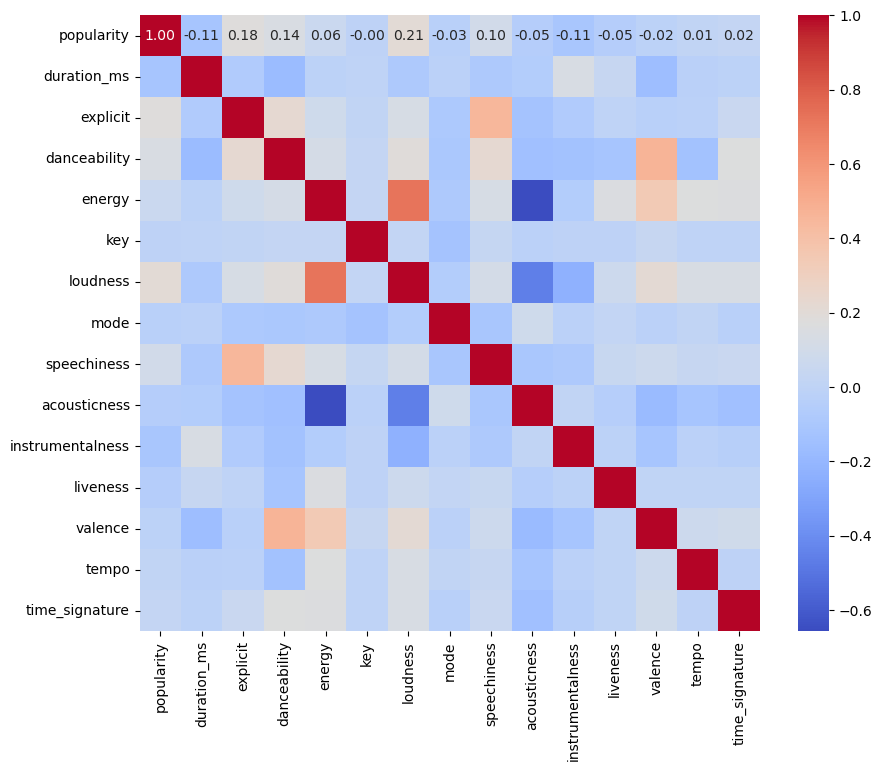

In [68]:
correlation_matrix = analysis_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()



In [69]:
df_filtered

,id,name,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,Bessie Smith,41,177133,0,0.614,0.0423,4,-12.033,1,0.0535,0.9960,0.002930,0.1830,0.211,89.822,4
1,3BFRqZFLSrqtQr6cjHbAxU,Ain't Misbehavin',Fats Waller,51,237773,0,0.515,0.2220,0,-16.918,0,0.0575,0.8210,0.001930,0.1900,0.350,98.358,4
2,0eInL1bLAFdHJDL04R0OCP,Two Sleepy People,Fats Waller,48,183560,0,0.651,0.0867,5,-18.882,1,0.0480,0.7250,0.000065,0.1690,0.540,87.221,4
3,2P9nh9pTK96dE0b6NBbTSs,"Dark Was the Night, Cold Was the Ground",Blind Willie Johnson,47,198560,0,0.394,0.0406,9,-23.179,1,0.0440,0.9680,0.045300,0.0976,0.200,116.117,1
4,0EzykG4pYlmmGTihakWGRL,It's Nobody's Fault but Mine,Blind Willie Johnson,43,188533,0,0.676,0.2520,3,-14.010,1,0.0390,0.9800,0.000074,0.1100,0.483,83.901,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105390,2z9iuAxKv4TTeCrPAxxKg9,Love Lost,"Mac Miller, The Temper Trap",80,162875,1,0.735,0.8120,2,-4.417,1,0.1510,0.5280,0.000000,0.1860,0.584,109.829,4
105391,0mL82sxCRjrs3br407IdJh,Is There Someone Else?,The Weeknd,86,199111,0,0.702,0.5860,9,-7.830,0,0.0313,0.0388,0.000073,0.1560,0.608,134.951,4
105392,4RVwu0g32PAqgUiJoXsdF8,Happier Than Ever,Billie Eilish,87,298899,1,0.332,0.2250,0,-8.697,1,0.0348,0.7670,0.003490,0.1280,0.297,81.055,3
105393,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),"Sam Smith, Kim Petras",86,156943,0,0.714,0.4720,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,4


In [70]:
df_filtered[features]

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,41,177133,0,0.614,0.0423,4,-12.033,1,0.0535,0.9960,0.002930,0.1830,0.211,89.822,4
1,51,237773,0,0.515,0.2220,0,-16.918,0,0.0575,0.8210,0.001930,0.1900,0.350,98.358,4
2,48,183560,0,0.651,0.0867,5,-18.882,1,0.0480,0.7250,0.000065,0.1690,0.540,87.221,4
3,47,198560,0,0.394,0.0406,9,-23.179,1,0.0440,0.9680,0.045300,0.0976,0.200,116.117,1
4,43,188533,0,0.676,0.2520,3,-14.010,1,0.0390,0.9800,0.000074,0.1100,0.483,83.901,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105390,80,162875,1,0.735,0.8120,2,-4.417,1,0.1510,0.5280,0.000000,0.1860,0.584,109.829,4
105391,86,199111,0,0.702,0.5860,9,-7.830,0,0.0313,0.0388,0.000073,0.1560,0.608,134.951,4
105392,87,298899,1,0.332,0.2250,0,-8.697,1,0.0348,0.7670,0.003490,0.1280,0.297,81.055,3
105393,86,156943,0,0.714,0.4720,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,4


In [77]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id= '76ff1108754147b0b59b9beb48e6af37',
    client_secret='32a408639a054cfead2b0432ac5b1f59'
))

def get_song_from_spotify(song_name, artist_name=None):
    try:
        search_query = song_name if not artist_name else f"{song_name} artist:{artist_name}"
        results = sp.search(q=search_query, limit=1, type='track')
        if results['tracks']['items']:
            track = results['tracks']['items'][0]
            audio_features = sp.audio_features(track['id'])[0]
            song_details = {
                'id': track['id'],
                'name': track['name'],
                'popularity': track['popularity'],
                'duration_ms': track['duration_ms'],
                'explicit': int(track['explicit']),
                'artists': ', '.join([artist['name'] for artist in track['artists']]),
                'danceability': audio_features['danceability'],
                'energy': audio_features['energy'],
                'key': audio_features['key'],
                'loudness': audio_features['loudness'],
                'mode': audio_features['mode'],
                'speechiness': audio_features['speechiness'],
                'acousticness': audio_features['acousticness'],
                'instrumentalness': audio_features['instrumentalness'],
                'liveness': audio_features['liveness'],
                'valence': audio_features['valence'],
                'tempo': audio_features['tempo'],
                'time_signature': audio_features['time_signature'],
            }
            return song_details
        else:
            return None
    except Exception as e:
        print(f"Error fetching song from Spotify: {e}")
        return None

In [78]:
get_song_from_spotify('flashing','kanye west')

{'id': '5TRPicyLGbAF2LGBFbHGvO',
 'name': 'Flashing Lights',
 'popularity': 89,
 'duration_ms': 237506,
 'explicit': 1,
 'artists': 'Kanye West, Dwele',
 'danceability': 0.639,
 'energy': 0.628,
 'key': 6,
 'loudness': -7.578,
 'mode': 0,
 'speechiness': 0.0399,
 'acousticness': 0.0381,
 'instrumentalness': 0,
 'liveness': 0.386,
 'valence': 0.43,
 'tempo': 90.482,
 'time_signature': 4}

In [82]:
df = df_filtered

In [91]:
def calculate_weighted_cosine_similarity(input_song_name, weights, num_songs_to_output, scaler=0):
    input_song = df[df['name'].str.lower() == input_song_name.lower()]
    
    if input_song.empty:
        print(f"Song named '{input_song_name}' not found in the database.")
        return pd.DataFrame()

    weights = np.array(weights) / np.sum(weights)

    features = df.select_dtypes(include=[np.number])

    if scaler == 0 :
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features)
    elif scaler == 1:
        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(features)
    else:
        scaled_features = features

    weighted_features = scaled_features * weights
    sparse_weighted_features = csr_matrix(weighted_features)

    input_song_index = input_song.index[0]
    cosine_similarities = cosine_similarity(sparse_weighted_features[input_song_index], sparse_weighted_features).flatten()    
    similar_song_indices = np.argsort(-cosine_similarities)[1:num_songs_to_output+1]  # Exclude the first one (input song)
    similar_songs = df.iloc[similar_song_indices][['name', 'artists']]

    return similar_songs

In [92]:
default_weights = [1/len(features)] * len(features)
recs = calculate_weighted_cosine_similarity('flashing lights',default_weights, 10, True)

In [93]:
recs

,name,artists
47947,Soliá,Bad Bunny
41240,Feeling,Dalex
35553,Hood Rich,Lil Tjay
34373,BEBE,"6ix9ine, Anuel AA"
34376,Pray For Me (with Kendrick Lamar),"The Weeknd, Kendrick Lamar"
43845,Pray For Me,"The Weeknd, Kendrick Lamar"
73477,Can't Die,Juice WRLD
48096,Todo o Nada,"Eladio Carrion, Corina Smith"
63319,Дежавю,kizaru
47897,LA DROGA,Bad Bunny


In [74]:
default_weights = [1/len(features)] * len(features)  # Equal weights by default

def get_closest_match(query, choices, limit=1):
    result = process.extractOne(query, choices)
    return result[0] if result else None

In [75]:
def recommend_songs_interface(song_name, num_songs_to_output, *input_weights):
    # Convert weights to float and normalize
    input_weights = np.array(input_weights, dtype=float)
    input_weights /= input_weights.sum()

    # If no weights are adjusted by the user, use default weights
    if np.all(input_weights == 0):
        input_weights = np.array(default_weights)

    # Fuzzy match song_name
    closest_match = get_closest_match(song_name, df['name'].tolist())
    if closest_match:
        # Calculate weighted cosine similarity
        similar_songs_df = calculate_weighted_cosine_similarity(closest_match, input_weights, num_songs_to_output)
        return similar_songs_df
    else:
        return f"No close match found for song '{song_name}'. Please check the spelling and try again."

In [ ]:
# Setup the Gradio interface
inputs = [gr.inputs.Textbox(label="Song Name", placeholder="Enter a song name..."),
          gr.inputs.Slider(minimum=1, maximum=10, default=5, label="Number of Songs to Output")]
for feature in features:
    inputs.append(gr.inputs.Slider(minimum=0, maximum=1, default=1/len(features), label=f"Weight for {feature}"))

outputs = gr.outputs.Dataframe()

iface = gr.Interface(fn=recommend_songs_interface,
                     inputs=inputs,
                     outputs=outputs,
                     title="Song Recommender",
                     description="Enter a song name to get song recommendations based on weighted features.")

In [ ]:
def update_database(new_song_info, df):
    # Perform assert checks for data integrity
    assert set(new_song_info.keys()) == set(df.columns), "Fields do not match the database schema."
    # Append new data to the DataFrame
    df = df.append(new_song_info, ignore_index=True)
    # Save the updated DataFrame back to CSV
    df.to_csv('your_file.csv', index=False)
    return df

In [ ]:
feature_columns = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
features = df[feature_columns].values
sparse_features = csr_matrix(features)

In [63]:
test = df_filtered[df_filtered['artists'].str.contains('^bad bunny.*', case=False, na=False)]

In [62]:
print(test['popularity'].mean())

73.74324324324324


In [61]:
test

,id,name,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
33096,6C1RD7YQVvt3YQj0CmuTeu,Diles,"Bad Bunny, Ozuna, Farruko, Arcangel, Ñengo Flo...",76,286041,1,0.813,0.560,2,-5.904,0,0.0618,0.1080,0.000000,0.2680,0.287,118.033,4
33124,1JxhrUWZjuI8AOjDJ1JpMN,Soy Peor,Bad Bunny,74,257384,1,0.808,0.611,0,-3.221,0,0.0663,0.6830,0.006380,0.1140,0.172,116.011,4
33760,5hcisvFMidkMJlElTO9Qmw,Sensualidad,"Bad Bunny, Prince Royce, J Balvin, Mambo Kingz...",73,297485,0,0.807,0.681,11,-6.268,1,0.0983,0.4230,0.000000,0.0962,0.676,140.006,4
33868,2QrGCbW0ylj94JfkgLZFlA,Pa Ti,"Bad Bunny, Bryant Myers",71,191295,1,0.760,0.718,1,-3.017,1,0.2320,0.3480,0.000000,0.0982,0.557,128.140,4
33949,2wgDAPgBhFA7pnIbm0YOhP,Me Mata,"Bad Bunny, Mambo Kingz, DJ Luian, Arcangel, Al...",70,412632,0,0.841,0.530,9,-11.467,1,0.2050,0.5510,0.000000,0.1190,0.686,114.028,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48028,0fgsKar6uBO08vzHXkTjWi,P FKN R,"Bad Bunny, Kendo Kaponi, Arcangel",69,258280,1,0.820,0.635,5,-5.749,0,0.0772,0.4090,0.000000,0.2440,0.528,101.024,4
48032,5gCg2qMPzKkW4jS4dBKdDs,Puesto Pa' Guerrial,"Bad Bunny, Myke Towers",68,190207,1,0.867,0.686,4,-5.342,1,0.2210,0.3110,0.000000,0.1000,0.658,139.968,4
48066,3XZeOzJ9tqnu58YP6cqApI,RONCA FREESTYLE,Bad Bunny,67,150060,1,0.856,0.656,5,-6.483,0,0.1310,0.1650,0.000000,0.0998,0.586,90.041,4
48071,4EJHKSnHENfjOxXWryyNtL,MÁS DE UNA CITA,"Bad Bunny, Zion & Lennox",69,183520,1,0.865,0.500,5,-10.805,1,0.0861,0.0122,0.000077,0.0980,0.317,92.976,4


In [ ]:
#tracks_data = pd.read_csv('/Users/vatsalb/Desktop/Projects/Music Reccomender/tracks.csv')
features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
scaler = StandardScaler()
tracks_scaled = scaler.fit_transform(filtered_data[features])
tracks_sparse = csr_matrix(tracks_scaled)

In [ ]:
tracks_data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import joblib
import gradio as gr
from langdetect import detect, LangDetectException
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import os
from fuzzywuzzy import process, fuzz
import numpy as np



def is_english_or_popular(title, popularity, popularity_threshold=40):
    try:
        return detect(title) == 'en' or popularity > popularity_threshold
    except LangDetectException:
        return False

tracks_data = pd.read_csv('tracks.csv')
tracks_data = tracks_data[tracks_data['popularity'] > 30]
tracks_data = tracks_data[tracks_data.apply(lambda x: is_english_or_popular(x['name'], x['popularity']), axis=1)]

features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'time_signature']

scaler = StandardScaler()
tracks_scaled = scaler.fit_transform(tracks_data[features])

def find_optimal_clusters(data, max_k=13):
    best_score = -1
    best_k = 2
    best_model = None

    sample_data = data[np.random.choice(data.shape[0], 10000, replace=False), :]

    for k in range(4, max_k + 1):  
        model = Birch(n_clusters=k)
        labels = model.fit_predict(sample_data)
        score = silhouette_score(sample_data, labels)

        if score > best_score:
            best_score = score
            best_k = k
            best_model = model

    return best_k, best_model

model_file = 'best_birch_model.joblib'
if not os.path.isfile(model_file):
    optimal_k, optimal_model = find_optimal_clusters(tracks_scaled)
    print(f"Optimal number of clusters: {optimal_k}")  # Print the optimal number of clusters
    joblib.dump(optimal_model, model_file)
else:
    optimal_model = joblib.load(model_file)

tracks_data['cluster_label'] = optimal_model.predict(tracks_scaled)

threshold = 80
def get_close_matches(df, song, artist, threshold):
    df['combined'] = df['name'] + ' ' + df['artists']
    song_matches = process.extract(song, df['combined'], limit=None, scorer=fuzz.token_set_ratio)
    artist_matches = process.extract(artist, df['combined'], limit=None, scorer=fuzz.token_set_ratio)
    close_song_matches = [df['combined'][index] for match, score, index in song_matches if score >= threshold]
    close_artist_matches = [df['combined'][index] for match, score, index in artist_matches if score >= threshold]
    close_matches = set(close_song_matches).intersection(set(close_artist_matches))
    filtered_df = df[df['combined'].isin(close_matches)]
    df.drop('combined', axis=1, inplace=True)
    return filtered_df.drop('combined', axis=1)

def recommend_songs(song, artist, top_n=5):
    filtered_df = get_close_matches(tracks_data, song, artist, threshold)
    if filtered_df.empty:
        return pd.DataFrame(columns=['Name', 'Artist'])

    cluster_label = filtered_df['cluster_label'].iloc[0]
    similar_songs = tracks_data[tracks_data['cluster_label'] == cluster_label].head(top_n)
    result_df = similar_songs[['name', 'artists']]
    result_df.columns = ['Name', 'Artist']
    
    return result_df

iface = gr.Interface(
    fn=recommend_songs,
    inputs=[
        gr.Textbox(label="Enter Song Name"),
        gr.Textbox(label="Enter Artist Name"), 
        gr.Slider(minimum=1, maximum=10, value=5, label="Number of Recommendations", step=1)
    ],
    outputs=gr.DataFrame()
)

iface.launch()
